## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### To expand the dataset and add random abnormalities to it, execute the next cell (uses `generate_data.py` script)

```bash 
! python generate_data.py
```

## Exploring the expanded dataset

In [ ]:
df = pd.read_csv("expanded_dataset.csv")
df.head()

In [4]:
df.describe()

,id,price,quantity
count,500.000000,500.000000,500.000000
mean,250.500000,135.304000,53.786000
std,144.481833,122.193068,26.391385
min,1.000000,-298.000000,10.000000
25%,125.750000,89.750000,31.000000
50%,250.500000,151.000000,53.000000
75%,375.250000,216.250000,76.000000
max,500.000000,300.000000,100.000000


## Data Insights:

1. Price column consists of negative values.
2. We can check if such values contribute to significant portion of data.
3. In case such data is of negligible proportion, we can remove it & save the clean dataset.

## Data cleaning & preprocessing

In [63]:
%timeit df.value_counts(df["price"] < 0)

963 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [64]:
%timeit np.sum((df.price.values.ravel() < 0))

17.2 µs ± 273 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [65]:
963 // 17.2

55.0

## Count Negative values using Numpy (as np wins easily, by ~55x)

In [67]:
null_count = np.sum(df.price.values.ravel() < 0)
null_count

47

### Calculate % of Negative Vals.

In [72]:
null_percent = (null_count / df.shape[0]) * 100
null_percent

9.4

### Remove Negative vals as it consists of a very tiny part `9.4%` of dataset

In [75]:
df.shape[0]

500

In [4]:
clean_df = df[df["price"] >= 0]
clean_df.shape

(453, 5)

## Visalizing distrbibution of price in Original data & Cleaned data

<Axes: xlabel='quantity', ylabel='price'>

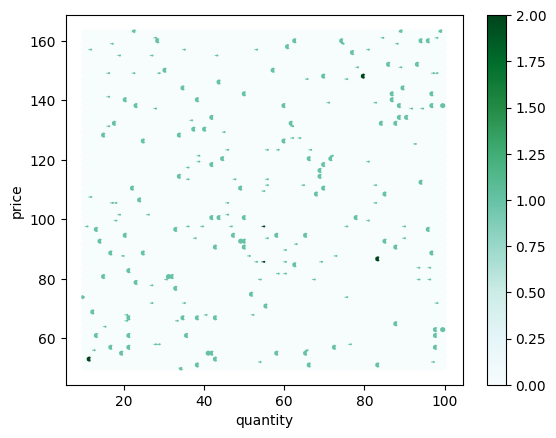

In [138]:
clean_df[clean_df["price"] <= np.median(clean_df["price"])].plot(y="price", x="quantity", kind="hexbin")

<Axes: xlabel='quantity', ylabel='price'>

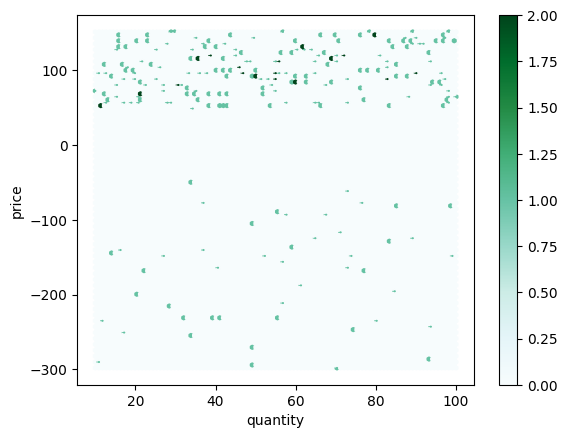

In [137]:
df[df["price"] <= np.median(df["price"])].plot(y="price", x="quantity", kind="hexbin")

<Axes: xlabel='category', ylabel='Total Price'>

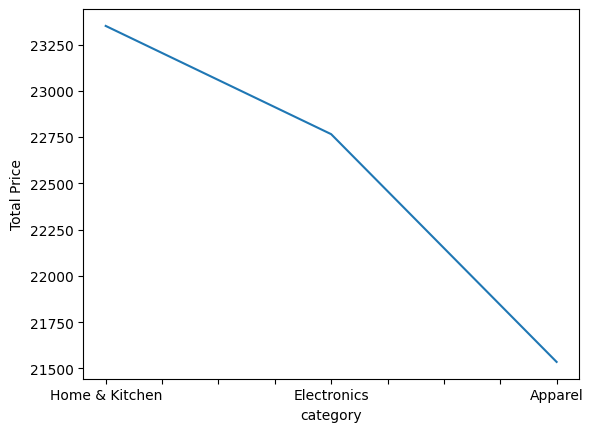

In [51]:
df.groupby("category")["price"].sum().sort_values(ascending=False).plot(kind="line", ylabel="Total Price")

<Axes: xlabel='Price', ylabel='category'>

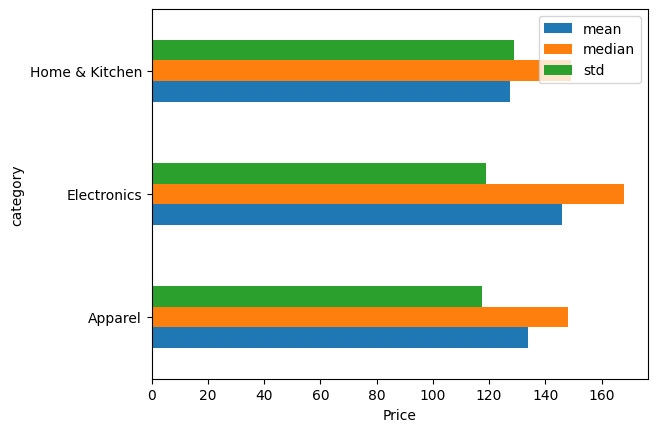

In [52]:
df.groupby("category")["price"].agg(["mean", "median", "std"]).plot(kind="barh", xlabel="Price")

In [159]:
avg_price = clean_df["price"].mean()
print(f"{avg_price = :.2f}")

avg_price = 167.26


## Getting various stats such as Avg, Median & Std from data

In [156]:
print(
    f"Average Price: {clean_df["price"].mean() :.2f}, \nSTD of Price: {clean_df["price"].std() :.2f}, \nMedian Price: {clean_df["price"].median() :.2f},"
)

Average Price: 167.26, 
STD of Price: 71.51, 
Median Price: 163.00,


## Converting data type of each column to suitable format

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        453 non-null    int64 
 1   name      453 non-null    object
 2   price     453 non-null    int64 
 3   quantity  453 non-null    int64 
 4   category  453 non-null    object
dtypes: int64(3), object(2)
memory usage: 21.2+ KB


In [ ]:
string_cols = clean_df.select_dtypes(include='object').columns
clean_df[string_cols] = clean_df[string_cols].fillna('').astype("str")

clean_df["price"] = clean_df["price"].astype("float")

C:\Users\somay\AppData\Local\Temp\ipykernel_264\459652348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[string_cols] = clean_df[string_cols].fillna('').astype("str")
C:\Users\somay\AppData\Local\Temp\ipykernel_264\459652348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["price"] = clean_df["price"].astype("float")


## Save cleaned dataset as csv

In [160]:
clean_df.to_csv("cleaned_data.csv", index=False)